## Import data from DB.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfOrg = pd.read_csv('hope_dataset_cleaned.csv')  

print(dfOrg.shape[0])

1243


In [3]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,male,27395425,2018,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",1.0
1,75.0,FISTULA PERITONEAL,male,28560554,2018,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
2,75.0,FISTULA PERITONEAL,male,28641726,2017,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
3,75.0,FISTULA PERITONEAL,male,26245344,2016,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
4,75.0,FISTULA PERITONEAL,male,28942543,2018,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
5,75.0,FISTULA PERITONEAL,male,24782153,2014,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
6,75.0,FISTULA PERITONEAL,male,28002229,2018,9,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
7,75.0,FISTULA PERITONEAL,male,27505109,2017,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
8,75.0,FISTULA PERITONEAL,male,24850546,2015,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
9,75.0,FISTULA PERITONEAL,male,29371050,2019,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN


## Transform (factorice) from Categories to continuous atributes

Transform 'pedido.data.attributes.diagnostic_main' atribute

In [4]:
dataDiagnosticMain, categoriesDiagnosticMain = pd.factorize(dfOrg['pedido.data.attributes.diagnostic_main'])

dfOrg['pedido.data.attributes.diagnostic_main'] = dataDiagnosticMain

Transform 'gender' atribute

In [5]:
dataGender, categoriesGender = pd.factorize(dfOrg['pedido.data.attributes.gender'])

dfOrg['pedido.data.attributes.gender'] = dataGender

Transform 'respuesta.pubmed_keys' atribute

In [6]:
categoriesORGPubMedKeys = dfOrg['respuesta.pubmed_keys'].value_counts()

print("total: " + str(categoriesORGPubMedKeys.size))

total: 80


In [7]:
dataPubMedKeys, categoriesPubMedKeys = pd.factorize(dfOrg['respuesta.pubmed_keys'])

dfOrg['respuesta.pubmed_keys'] = dataPubMedKeys

In [8]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,0,27395425,2018,1,0,1.0
1,75.0,0,0,28560554,2018,4,0,NaN
2,75.0,0,0,28641726,2017,12,0,NaN
3,75.0,0,0,26245344,2016,12,0,NaN
4,75.0,0,0,28942543,2018,6,0,NaN
5,75.0,0,0,24782153,2014,6,0,NaN
6,75.0,0,0,28002229,2018,9,0,NaN
7,75.0,0,0,27505109,2017,4,0,NaN
8,75.0,0,0,24850546,2015,1,0,NaN
9,75.0,0,0,29371050,2019,4,0,NaN


In [9]:
print("age NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.age'])].shape[0]))
print("diagnostic_main NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.diagnostic_main'])].shape[0]))
print("gender NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.gender'])].shape[0]))
print("articulo NaN => " + str(dfOrg[pd.isnull(dfOrg['articulo'])].shape[0]))
print("articlesRevisedYear NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.articlesRevisedYear'])].shape[0]))
print("articlesRevisedMonth NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.articlesRevisedMonth'])].shape[0]))
print("pubmed_keys NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.pubmed_keys'])].shape[0]))
print("utilidad NaN => " + str(dfOrg[pd.isnull(dfOrg['utilidad'])].shape[0]))

age NaN => 10
diagnostic_main NaN => 0
gender NaN => 0
articulo NaN => 0
articlesRevisedYear NaN => 0
articlesRevisedMonth NaN => 0
pubmed_keys NaN => 0
utilidad NaN => 1192


Remove row with age eq NaN

In [10]:
dfOrg = dfOrg[pd.notnull(dfOrg['pedido.data.attributes.age'])]

## Standardize the Data

Choosed "age", "diagnostic_main", "year", "pubmed_keys" and "articulo" attributes (based on PCA_V2 study)

In [11]:
from sklearn.preprocessing import StandardScaler

features = ["pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo"]

# Separating out the features
x = dfOrg.loc[:, features].values

featuresTransformed = StandardScaler().fit_transform(x)

dfStandarized = pd.DataFrame(featuresTransformed, index=dfOrg.index, columns=features)
dfStandarized['utilidad'] = dfOrg['utilidad']

dfStandarized


,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.pubmed_keys,articulo,utilidad
0,1.443474,-1.360638,0.643671,-1.650220,-0.221939,1.0
1,1.443474,-1.360638,0.643671,-1.650220,0.137839,NaN
2,1.443474,-1.360638,0.224418,-1.650220,0.162904,NaN
3,1.443474,-1.360638,-0.194835,-1.650220,-0.577070,NaN
4,1.443474,-1.360638,0.643671,-1.650220,0.255793,NaN
...,...,...,...,...,...,...
1238,-0.429381,-0.580827,-0.194835,1.520816,0.574852,NaN
1239,-0.429381,-0.580827,1.062924,1.520816,-0.540973,NaN
1240,-0.429381,-0.580827,-0.614089,1.520816,0.801912,NaN
1241,-0.429381,-0.580827,1.062924,1.520816,-0.056202,NaN


## Separe data by utilidad is defined

In [12]:
dfDataSetComplete = dfStandarized[pd.notnull(dfOrg['utilidad'])]

print(dfDataSetComplete.shape[0])

dfDataSetToPredict = dfStandarized[pd.isnull(dfOrg['utilidad'])]

print(dfDataSetToPredict.shape[0])

51
1182


In [13]:
dfDataSetComplete.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.pubmed_keys,articulo,utilidad
0,1.443474,-1.360638,0.643671,-1.650220,-0.221939,1.0
32,1.443474,-1.360638,0.224418,-1.529801,0.179117,1.0
230,-0.478666,-0.775780,-2.291102,-0.807286,0.213394,0.0
290,0.260618,-0.385874,-2.291102,-0.727007,-0.178041,0.0
299,0.260618,-0.385874,1.062924,-0.727007,0.010654,1.0
300,-1.365808,-0.288397,1.062924,-0.686867,-0.944476,1.0
303,-1.365808,-0.288397,0.224418,-0.686867,0.359861,0.0
304,-1.365808,-0.288397,0.224418,-0.686867,0.359861,0.0
305,-1.365808,-0.288397,0.224418,-0.686867,-0.015068,1.0
311,1.492759,-0.190921,1.062924,-0.646728,0.817865,1.0


## Logistic Regression

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [15]:
dfDataSetComplete.describe()

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.pubmed_keys,articulo,utilidad
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.459694,-0.116380,0.092887,-0.190237,-0.069174,0.588235
std,1.083386,0.576213,1.157292,0.553751,0.798659,0.497050
min,-1.365808,-1.360638,-2.710355,-1.650220,-2.179545,0.000000
25%,-0.823666,-0.580827,-0.194835,-0.526309,-0.540973,0.000000
50%,0.901332,-0.190921,0.224418,-0.205191,0.124179,1.000000
75%,1.443474,0.101508,1.062924,0.015577,0.510923,1.000000
max,1.739187,1.466178,1.062924,1.279978,1.050230,1.000000


We check the number of results

In [16]:
 dfDataSetComplete.groupby('utilidad').size()

utilidad
0.0    21
1.0    30
dtype: int64

Choosed "age", "diagnostic_main", "year", "pubmed_keys" and "articulo" attributes (based on PCA_V2 study)

In [17]:
dataToTrain = dfDataSetComplete[[
    "pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo",
    "utilidad"
]]


X = np.array(dataToTrain.drop(['utilidad'],1))
y = np.array(dataToTrain['utilidad'])
X.shape

(51, 5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
 
model.score(X_train,y_train)

0.6578947368421053

In [20]:
# see: https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % ("Logistic Regression", cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.508333 (0.289756)


In [21]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6153846153846154


In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

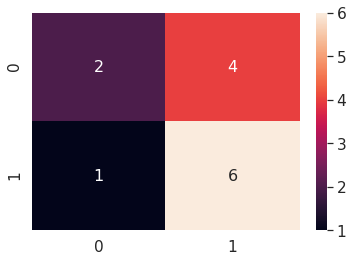

In [23]:
cf = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(cf, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Run Prediction

In [24]:
result = model.predict(dfDataSetToPredict[[
    "pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo"
]])

result

array([1., 1., 1., ..., 0., 0., 0.])